In [15]:
import pandas as pd
import seaborn as sns

In [12]:
data=pd.read_csv("outlier_weight_height.csv")
df=pd.read_csv("pivot_data.csv")
df

,date,city,event,windspeed,temperature
0,1/1/2017,us,Rain,6,32
1,1/4/2017,new york,Sunny,8,34
2,1/4/2017,canada,Sunny,6,20
3,1/4/2017,mumbi,Rain,9,12
4,1/4/2017,BD,Rain,10,34
5,1/4/2017,new york,Sunny,7,28
6,1/4/2017,canada,Sunny,4,36
7,1/4/2017,us,Rain,11,32
8,1/4/2017,BD,Rain,7,45


In [3]:
total_data=data.shape[0]

In [4]:
#covariance formula x
def a_formula():
    square_a=data["Height"]**2
    total=0
    for i in square_a:
        total=total+i
    return total

def variance_a():
    return ((a_formula()/total_data)-(data["Height"].mean())**2)
variance_a()

14.709674329182235

In [5]:
#covariance formula y
def b_formula():
    square_a=data["Weight"]**2
    total=0
    for i in square_a:
        total=total+i
    return total

def variance_b():
    return ((b_formula()/total_data)-(data["Weight"].mean())**2)
variance_b()

1025.75327694511

In [6]:
def pcc():
    return (variance_a()*variance_b())/(data["Height"].std()*data["Weight"].std())
pcc()

122.82294974423436

In [7]:
data[["Height","Weight"]].corr(method='pearson')

,Height,Weight
Height,1.000000,0.924365
Weight,0.924365,1.000000


In [8]:
data["Height"].std()

3.83551124027943

In [9]:
df=(data[["Height","Weight"]].cov())/(data["Height"].std()*data["Weight"].std())
df

,Height,Weight
Height,0.119751,0.924365
Weight,0.924365,8.350643


In [20]:
class pcc:
    def __init__(self,x,y,data):
        self.data_x=x
        self.data_y=y
        self.data=data
    def total(self):
        return data.shape[0]
    def total_x(self):
        total=0
        for i in self.data_x:
            total=total+i
        return total
    def total_y(self):
        total=0
        for i in self.data_y:
            total=total+i
        return total
    def square_x(self):
        square=self.data_x*self.data_x
        total=0
        for i in square:
            total=total+i
        return total
    def square_y(self):
        square=self.data_y*self.data_y
        total=0
        for i in square:
            total=total+i
        return total
    def multiply_xy(self):
        xy=self.data_x*self.data_y
        total=0
        for i in xy:
            total=total+i
        return total
    def Correlation(self):
        formula_x=(self.total()*self.multiply_xy())-(self.square_x()*self.square_y())
#         last=sqrt(((self.total()*self.square_x())-self.square_y())-((self.total()*self.square_y())-self.square_y()))
        formula_y=(self.total()*self.square_x())-self.square_y()
        formula_z=(self.total()*self.square_y())-self.square_y()
        return (formula_x/(formula_y*formula_z)**0.5)
obj=pcc(data["Height"],data["Weight"],data)
# print(obj.square_x())
# print(obj.square_y())
obj.Correlation()

-10942.050964483507

In [ ]:
8**0.5

<AxesSubplot:xlabel='Height', ylabel='Weight'>

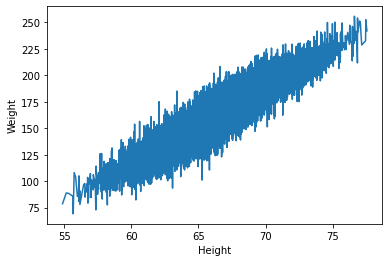

In [19]:
sns.lineplot(data=data, x="Height", y="Weight")